In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

pi = math.pi

In [3]:
# Writing out the constants with units
m = 10000 # mass in kgs
P_static = 1500 # Static force in N
delta_static = 7/1000 # static deflection in mm
xi = 0.02 # (No units)Damping Ratio of the system

# Calculating properties of the material
k = round(P_static/delta_static,3) # Stiffness of the system in N/m
print('The Stiffness of the system is,k',k,'N/mm')
omega_n = round(np.sqrt(k/m),3)
print('The natural circular frequency is omega_n ',omega_n)
T_n = round((2*pi)/omega_n,3)
print('The natural period of the system is T_n',T_n,'seconds')

The Stiffness of the system is,k 214285.714 N/mm
The natural circular frequency is omega_n  4.629
The natural period of the system is T_n 1.357 seconds


In [4]:
# Dynamic Properties of the system
P = 600 # Magnitude of force applied harmonically to the system in N
f = 0.9 # Frequency at which forcing frequency is applied to the system ins Hz
omega = round(2*pi*f,3) # The forcing circular frequency in 
print('The circular forcing frequency is omega',omega)
beta  = round(omega/omega_n,3)
print('The frequency ratio beta',beta)

The circular forcing frequency is omega 5.655
The frequency ratio beta 1.222


In [5]:
#                                    Dynamic Amplification Factor
beta # is the frequency ratio of our system 
DMF = round(1/(np.sqrt( (1-beta**2)**2 + (2*xi*beta)**2 )),3)
print('The Dynamic Response Factor of the system is',DMF)
# This shows that due to the forcing function applied at forcing frequency the steady state response of the structure will 
# be = DMF*static response of system for the force

##                         Phase Angle of the system

phase = round(np.arctan2(2*xi*beta,(1-beta**2)),3)
print('The phase of the motion is',phase)

The Dynamic Response Factor of the system is 2.017
The phase of the motion is 3.043


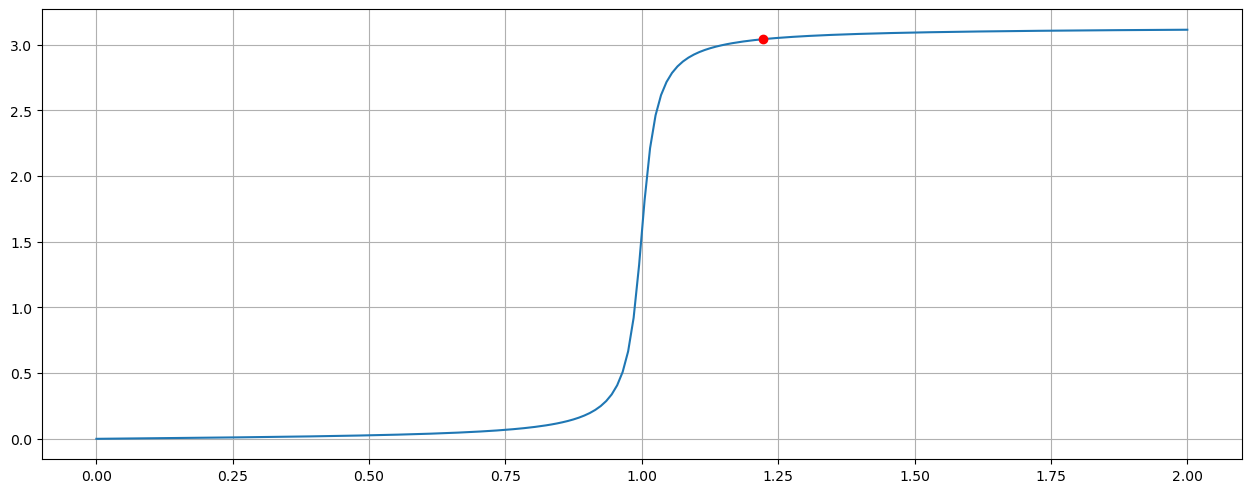

In [6]:
# Visualization of phase angle variation with beta
min_B = 0
max_B = 2
delta_B = 0.01
nPoints = max_B/delta_B
B = np.linspace(min_B,max_B,int(nPoints))
phi = np.arctan2(2*xi*B, 1-B**2)
fig = plt.figure(figsize=(8,3))
axes = fig.add_axes([0.1,0.05,1.5,1.5])
axes.plot(B,phi)
axes.plot(beta,phase,'ro')
axes.grid()

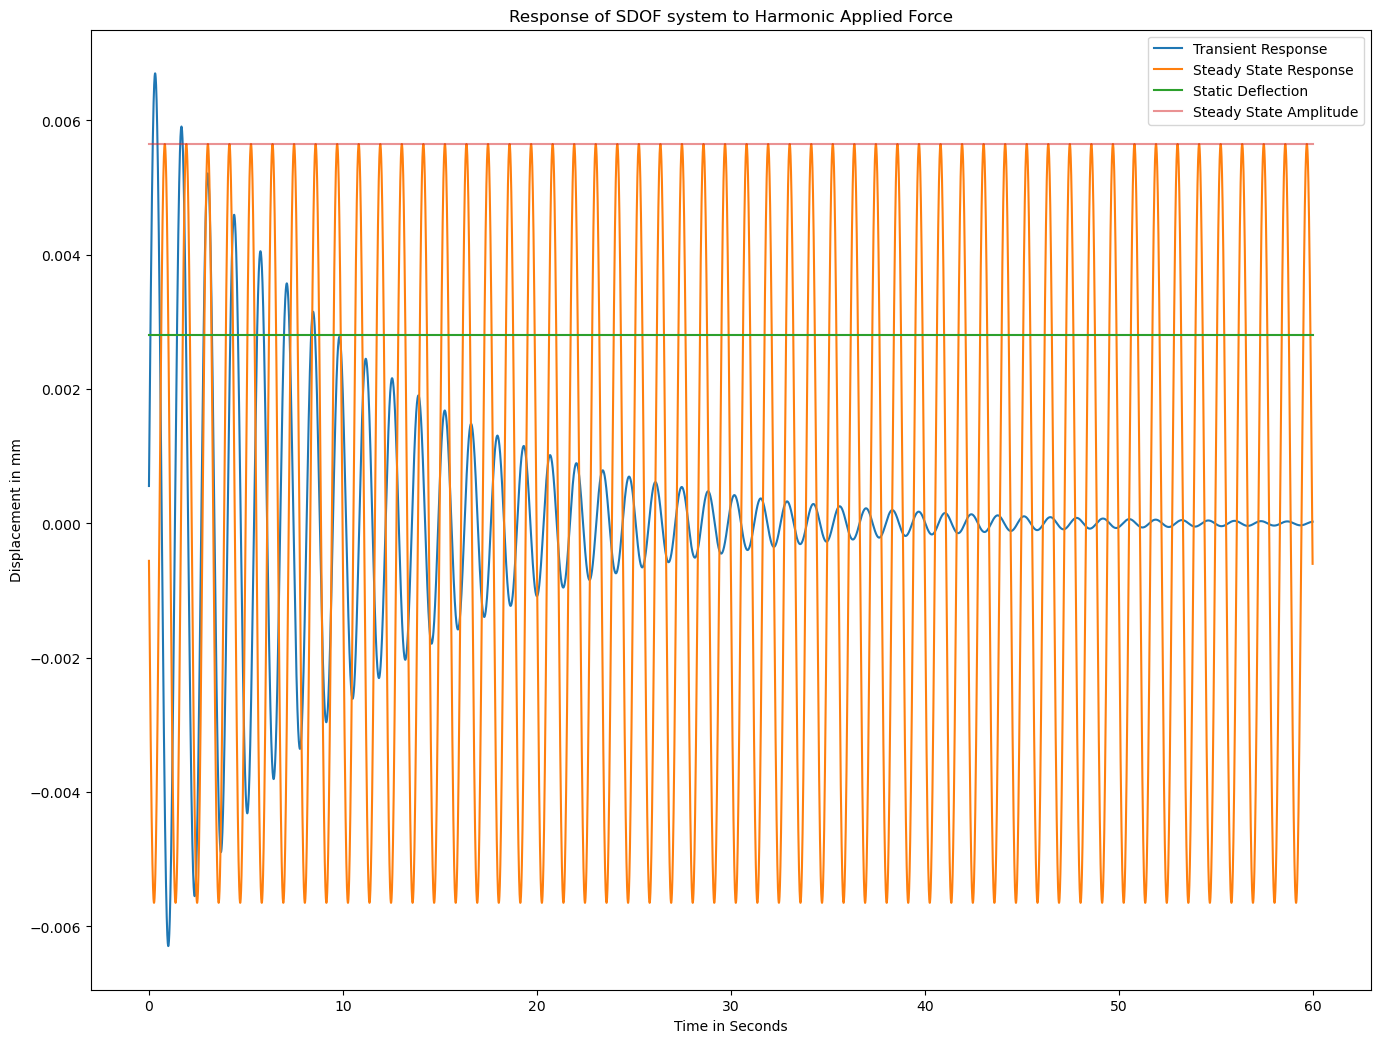

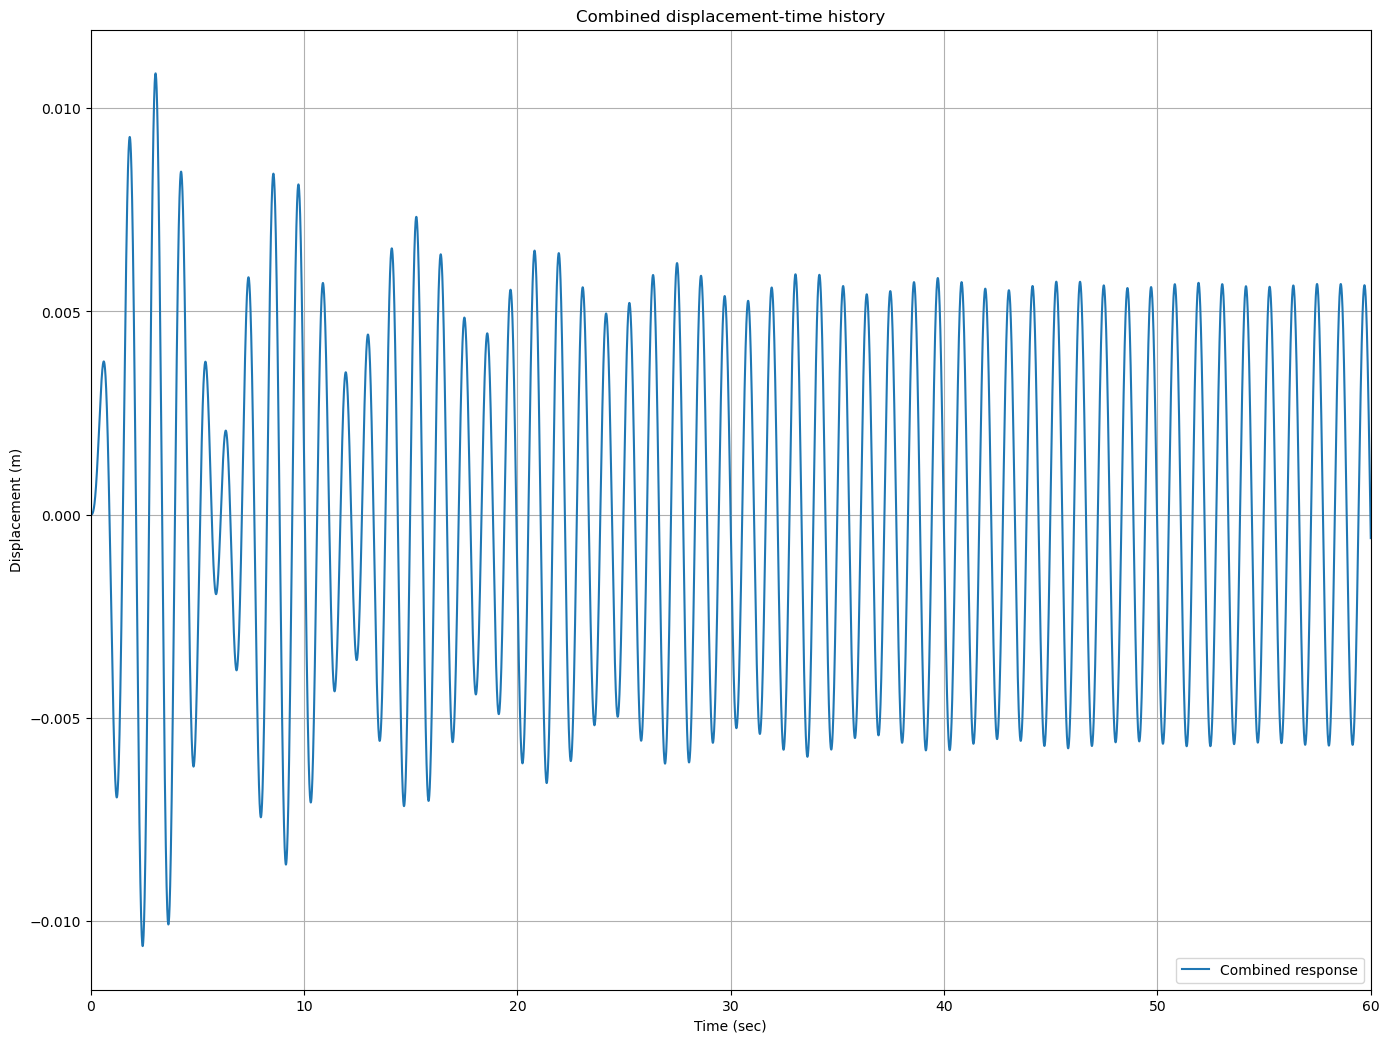

In [13]:
# Calculating the response of the structure.
O = (P/k)*(1/ ( (1-beta**2)**2 + (2*xi*beta)**2 ))
C1 = O*(1-beta**2)
C2 = -O*2*xi*beta
omega_d = omega_n*math.sqrt(1- xi**2)
A = (-1/omega_d)*(C1*omega + C2*xi*omega_n)
B = -C2

t_max = 60
delta_t = 0.001
nPoints = t_max/delta_t
t = np.linspace(0,t_max,int(nPoints))

ut = math.e**(-xi*omega_n*t)*(A*np.sin(omega_d*t) + B*np.cos(omega_d*t))
uc = O*( (1-beta**2)*np.sin(omega*t) - 2*xi*beta*np.cos(omega*t) )

# Plotting of graphs 

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
axes.plot(t,ut,label = 'Transient Response')
axes.plot(t,uc,label = 'Steady State Response')
axes.plot([0,t_max],[P/k,P/k],label = 'Static Deflection')
axes.plot([0,t_max],[DMF*(P/k),DMF*(P/k)],label = 'Steady State Amplitude',alpha = 0.5)
axes.set_title('Response of SDOF system to Harmonic Applied Force')
axes.set_xlabel('Time in Seconds')
axes.set_ylabel('Displacement in mm')
plt.legend()

fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(t,(ut+uc), label='Combined response')
axes.set_xlim([0,t_max])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Combined displacement-time history')
axes.grid()
axes.legend(loc='lower right')
plt.show()

#### To calculate the response of structure when the harmonic force is removed after 11 seconds

In [19]:
time = 11 # time at which we want to calculate position and velocity

# Position
ut = math.e**(-xi*omega_n*time)*(A*np.sin(omega_d*time) + B*np.cos(omega_d*time))
uc = O*( (1-beta**2)*np.sin(omega*time) - 2*xi*beta*np.cos(omega*time) )
u = ut+uc
print(f"The postition of the mass at time t = {time} is {round(u,4)} m.")

# Velocity
term1 = math.e**(-xi*omega_n*time)*np.cos(omega_d*time)*omega_d - math.e**(-xi*omega_n*time)*xi*omega_n*np.sin(omega_d*time)
term2 = -math.e**(-xi*omega_n*time)*xi*omega_n*np.cos(omega_d*time) - math.e**(-xi*omega_n*time)*np.sin(omega_d*time)*omega_d
v = A*term1 + B*term2 + C1*omega*np.cos(omega*time) - C2*omega*np.sin(omega*time)
print(f'The velocity at time = {time} is {round(v,4)} m/s')


The postition of the mass at time t = 11 is 0.0045 m.
The velocity at time = 11 is -0.0191 m/s


In [21]:
# When the force is removed at time = 11 seconds, then we are only observing the transient response of the structure.
a = math.e**(-xi*omega_n*time)*np.sin(omega_d*time)
b = math.e**(-xi*omega_n*time)*np.cos(omega_d*time)

print(f'a is {round(a,4)}')
print(f'b is {round(b,4)}')
print(f'term1 is {round(term1,4)}')
print(f'term2 is {round(term2,4)}')

a is 0.2167
b is 0.289
term1 is 1.3174
term2 is -1.0295


In [32]:
# matrix
matrix = np.mat([[a,b],[term1,term2]])
vector = np.array([[u],[v]])

constants = matrix.I * vector
A = constants[0].item()
B = constants[1].item()
print(f'A = {round(A,4)}')
print(f'B = {round(B,4)}')

A = -0.0015
B = 0.0167


In [38]:
time = 30
a = math.e**(-xi*omega_n*time)*np.sin(omega_d*time)
b = math.e**(-xi*omega_n*time)*np.cos(omega_d*time)
u30 = A*a + B*b
print(f'Displacement at u = 30 seconds is {round(u30,4)} m.')

Displacement at u = 30 seconds is 0.0008 m.


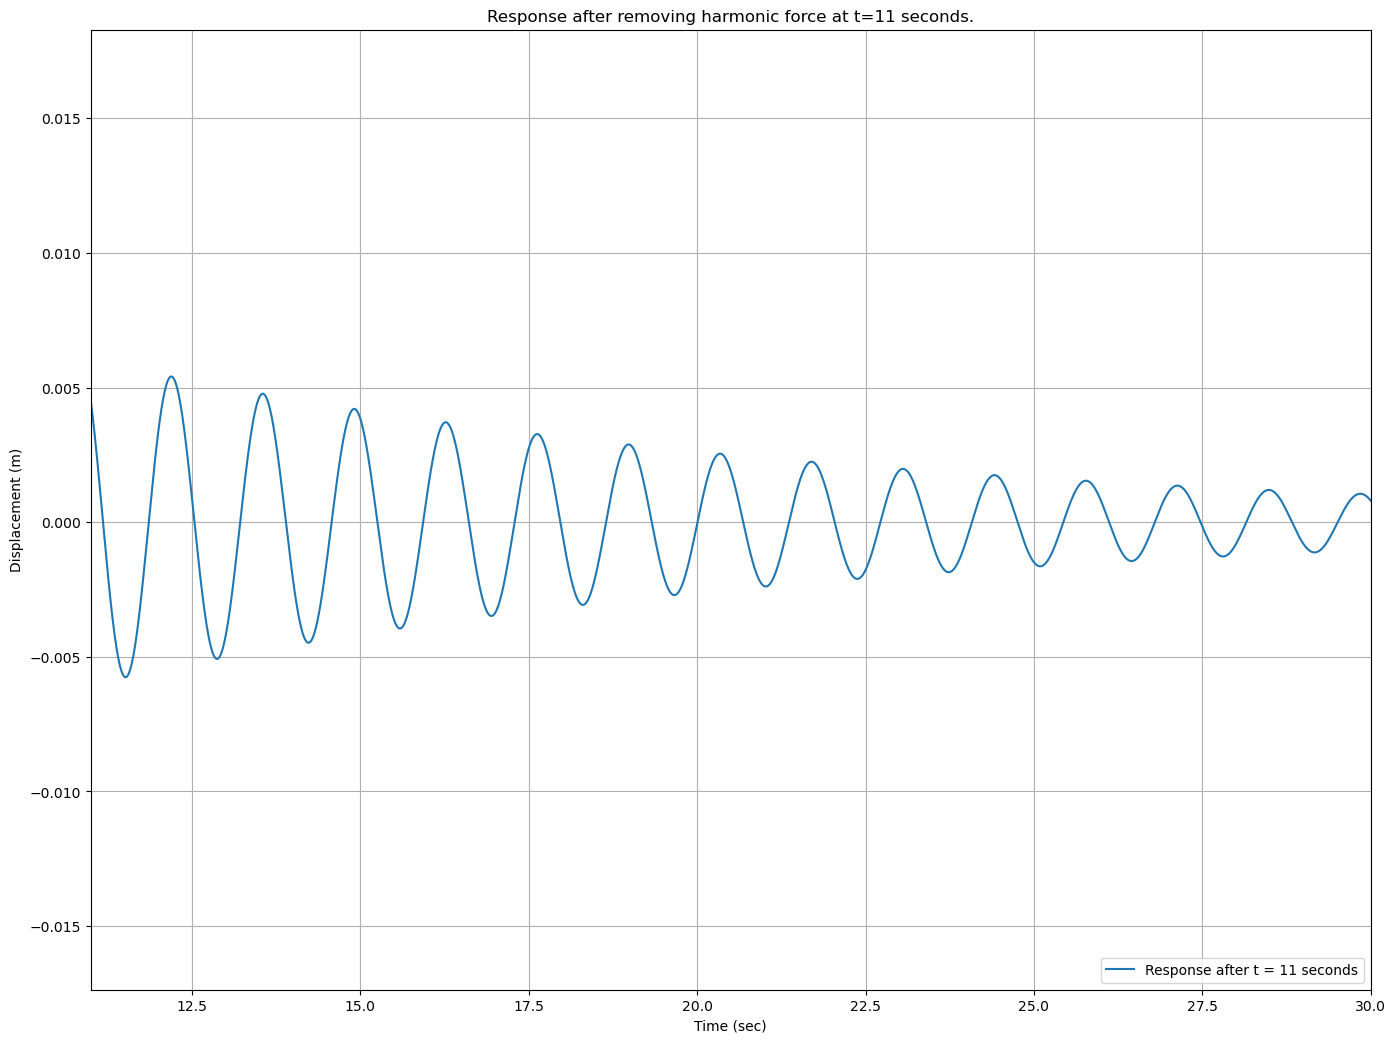

In [43]:
tmax = 30
deta_t = 0.001
nPoints = tmax/delta_t
t = np.linspace(0,tmax,int(nPoints))

u0_30 = math.e**(-xi*omega_n*t)*(A*np.sin(omega_d*t) + B*np.cos(omega_d*t))
# Plotting 

fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(t,(u0_30), label='Response after t = 11 seconds')
axes.set_xlim([11,tmax])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Response after removing harmonic force at t=11 seconds.')
axes.grid()
axes.legend(loc='lower right')
plt.show()